In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import optimizer as opt


# load dataset mushroom
x = loadmat('mushroom.mat')
feature = x['mushroom_tr_feature']
label = x['mushroom_tr_label']

# parameters selection
[n_data, dim] = feature.shape
R = 70
n_iter = 1000

# initialization
x_init = np.zeros((dim, 1))

constraints = ['l1', 'l2', 'n_supp']

fw = dict(l1=None,
          l2=None,
          n_supp=None
        )

fw_s = dict(l1=None,
          l2=None,
          n_supp=None
        )

fw_ds = dict(l1=None,
          l2=None,
          n_supp=None
        )

wfw = dict(l1=None,
          l2=None,
          n_supp=None
        )

wfw_s = dict(l1=None,
          l2=None,
          n_supp=None
        )

wfw_ds = dict(l1=None,
          l2=None,
          n_supp=None
        )

ufw = dict(l1=None,
          l2=None,
          n_supp=None
        )

ufw_s = dict(l1=None,
          l2=None,
          n_supp=None
        )

ufw_ds = dict(l1=None,
          l2=None,
          n_supp=None
        )


for constraint in constraints:
    """
    choices for learning rate: 
        'pf': parameter-free step sizes
        's': smooth step sizes
        'ds': directionally smooth step sizes
    """
    # FW
    fw[constraint] = opt.fw(x_init, n_iter, feature, label, constraint, R, 'pf')
    fw_s[constraint] = opt.fw(x_init, n_iter, feature, label, constraint, R, 's')
    fw_ds[constraint] = opt.fw(x_init, n_iter, feature, label, constraint, R, 'ds')

    # WFW
    wfw[constraint] = opt.wfw(x_init, n_iter, feature, label, constraint, R, 'pf')
    wfw_s[constraint] = opt.wfw(x_init, n_iter, feature, label, constraint, R, 's')
    wfw_ds[constraint] = opt.wfw(x_init, n_iter, feature, label, constraint, R, 'ds')
    
    # UFW
    ufw[constraint] = opt.ufw(x_init, n_iter, feature, label, constraint, R, 'pf')
    ufw_s[constraint] = opt.ufw(x_init, n_iter, feature, label, constraint, R, 's')
    ufw_ds[constraint] = opt.ufw(x_init, n_iter, feature, label, constraint, R, 'ds')
    

Constraint set: l1 norm ball


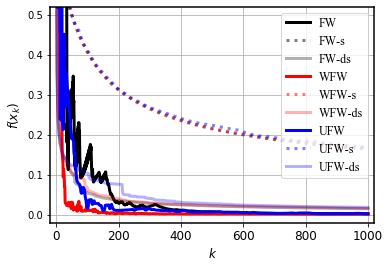

Constraint set: l2 norm ball


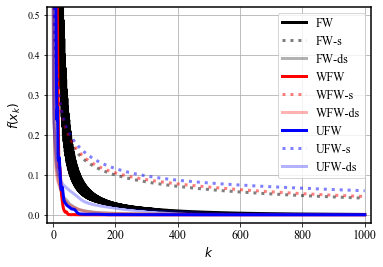

Constraint set: n_supp norm ball


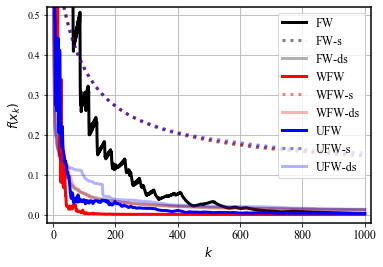

In [3]:

# iter_idx = np.asarray([i for i in range(n_iter+1)])

for constraint in constraints:
    print('Constraint set: {} norm ball'.format(constraint))
    fig, ax = plt.subplots()

    # FW
    plt.plot(np.asarray(fw[constraint]), 'k', linewidth=3, label='FW')
    plt.plot(np.asarray(fw_s[constraint]), 'k:', alpha = 0.5, linewidth=3, label='FW-s')
    plt.plot(np.asarray(fw_ds[constraint]), 'k', alpha = 0.3, linewidth=3, label='FW-ds')

    # WFW
    plt.plot(np.asarray(wfw[constraint]), 'r', linewidth=3, label='WFW')
    plt.plot(np.asarray(wfw_s[constraint]), 'r:', alpha = 0.5, linewidth=3, label='WFW-s')
    plt.plot(np.asarray(wfw_ds[constraint]), 'r', alpha = 0.3, linewidth=3, label='WFW-ds')


    # UFW
    plt.plot(np.asarray(ufw[constraint]), 'b', linewidth=3, label='UFW')
    plt.plot(np.asarray(ufw_s[constraint]), 'b:', alpha = 0.5, linewidth=3, label='UFW-s')
    plt.plot(np.asarray(ufw_ds[constraint]), 'b', alpha = 0.3, linewidth=3, label='UFW-ds')


    plt.rcParams["font.family"] = "Times New Roman"
    plt.subplots_adjust(left=0.19, right=0.94, bottom=0.13)
    legend = plt.legend(loc='upper right', shadow=False, fontsize=12, fancybox = True)
    plt.ylim([-0.02,0.52])
    plt.xlim([-20,1020])
    plt.grid(b=True, which='major')
    plt.xticks([0,200,400, 600,800,1000], fontsize=12)

    ax=plt.gca()
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_linewidth(1.5)

    plt.xlabel('$k$',fontsize=12)
    plt.ylabel('$f(x_k)$',fontsize=12)

    plt.show()
